In [1]:
# Setting up dependencies to be utilized later here.
import pandas as pd
from pathlib import Path

import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import calendar


In [2]:
# Converting .csv file into a dataframe for data manipulation
wa_lottery_path = Path("Resources/lottery_data.csv")
wa_lottery_df = pd.read_csv(wa_lottery_path)

# displaying .csv just to see what data we have
wa_lottery_df

,date,weekday,winning_numbers,powerball,powerplay,jackpot
0,5/7/2014,Wed,17-29-31-48-49,34,2,7.000000e+07
1,5/10/2014,Sat,4-31-41-47-55,1,2,9.000000e+07
2,5/14/2014,Wed,7-33-39-52-55,33,3,9.000000e+07
3,5/17/2014,Sat,23-32-39-47-49,22,3,1.140000e+08
4,5/21/2014,Wed,4-20-34-39-58,31,5,1.140000e+08
...,...,...,...,...,...,...
945,10/24/2022,Mon,18-23-35-45-54,16,4,6.250000e+08
946,10/26/2022,Wed,19-36-37-46-56,24,2,7.000000e+08
947,10/29/2022,Sat,19-31-40-46-57,23,3,8.250000e+08
948,10/31/2022,Mon,13-19-36-39-59,13,3,1.000000e+09


In [3]:
# Generated a new dataframe that holds only the two columns 'weekday' + 'powerball'
weekday_powerball = wa_lottery_df[['weekday','powerball']]

# groupby weekday (sets index to weekday), for the column 'powerball' using pandas apply function lambda x: x.mode().max()
# to every single row for Sat and returns the most common mode # for that column then does the same for Wed.
# lambda is a keyword that is built into python to create a anonymous function
# lambda : An anonymous inline function consisting of a single expression which is evaluated when the function is called. 
# The syntax to create a lambda function is lambda [parameters]: expression.  This is from the official python documentation
powerball_grouped = weekday_powerball.groupby('weekday')['powerball'].apply(lambda x: x.mode())

In [4]:
# Generated a new dataframe that holds only the two columns 'weekday' + 'powerplay'
weekday_powerplay = wa_lottery_df[['weekday', 'powerplay']]

# groupby weekday (sets index to weekday), for the column 'powerplay' using pandas apply function lambda x: x.mode().max()
# to every single row for Sat and returns the most common mode # for that column then does the same for Wed.
powerplay_grouped = weekday_powerplay.groupby('weekday')['powerplay'].apply(lambda x: x.mode())

In [5]:
# Combine powerplay/powerball common
combined_common_weekday = pd.merge(powerball_grouped, powerplay_grouped, on ='weekday')

# Display the data types of the columns in the DataFrame


# Question 1 Answer
combined_common_weekday

,powerball,powerplay
weekday,,
Mon,16,2
Mon,22,2
Sat,18,2
Wed,24,2


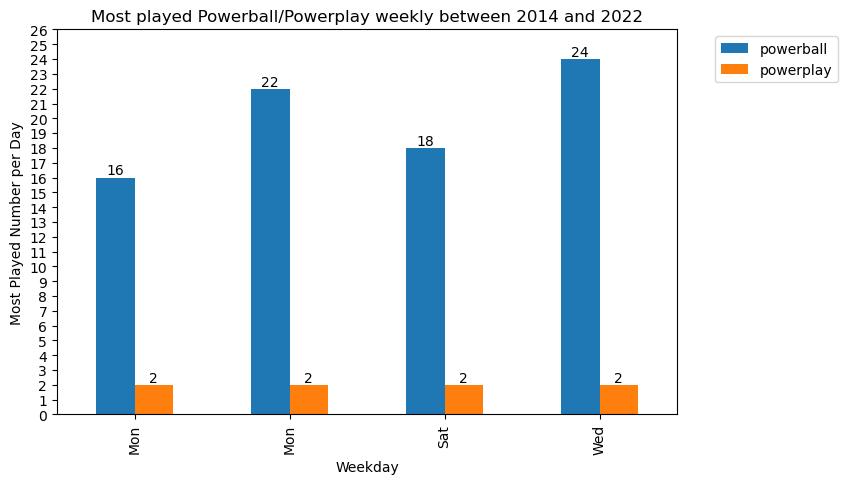

<Figure size 640x480 with 0 Axes>

In [6]:
# Create a bar chart based off of the group series from before
ax = combined_common_weekday.plot(kind='bar', figsize=(8,5))

# set the y-axis so it looks better
ax.set_ylim(0, 19)
ax.set_yticks(range(0, 27, 1))

# Label the axis and title the graph
ax.set_xlabel("Weekday")
ax.set_ylabel("Most Played Number per Day")
ax.set_title('Most played Powerball/Powerplay weekly between 2014 and 2022')
ax.legend(title = 'Lottery', loc = 'upper right')
for container in ax.containers:
    ax.bar_label(container)
    
# Create a custom legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.show()
plt.tight_layout()


In [7]:
# create a copy of the original dataframe with columns 'date' and 'powerball'
# This will eliminate any warnings about the original dataframes index
date_powerball = wa_lottery_df[['date', 'powerball']].copy()

# convert the date column object(mm/dd/yyyy) into a datetime object (yyyy-mm-dd) [pandas reference: 
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html]
date_powerball['date'] = pd.to_datetime(date_powerball['date'])

# Now I can generate a new column that will hold the months 
# (ex: january == 1, february == 2)
# [pandas.Series.dt = https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.html]
date_powerball['month'] = date_powerball['date'].dt.month

# make a variable that holds a dataframe that is grouped by month
month = date_powerball.groupby('month')

# create an empty dictionary
powerball_common = {}

# create a loop that will iterate through 1-12 (for the months).  
for i in range(1,13):
    
    #set a variable to hold the group by each month
    month_data = month.get_group(i) 
    # Getting rows

    # take the variable month_data the mode and store to list
    powerball_common[i] = month_data['powerball'].mode().to_list()

# Convert my dictionary to a series so I can use the .apply() function and lambda to it.
powerball_common_series = (pd.Series(powerball_common))

# use the .apply() function with the lambda function to perform a loop through all the series and store the modes that don't have mode = 1.
cleaned_powerball_common = powerball_common_series.apply(lambda x: x if len(x) != 9 else None)

# I utilized pd.DataFrame.from_dict() from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html 
# to convert my dictionary from my for loop into a DataFrame.
powerball_common_months = cleaned_powerball_common.to_frame(name='Common Powerballs')  

In [8]:
# create a copy of the original dataframe with columns 'date' and 'powerplay'
# This will eliminate any warnings about the original dataframes index
date_powerplay = wa_lottery_df[['date', 'powerplay']].copy()

# convert the date column object(mm/dd/yyyy) into a datetime object (yyyy-mm-dd) [pandas reference: 
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html]
date_powerplay['date'] = pd.to_datetime(date_powerplay['date'])

# Now I can generate a new column that will hold the months 
# (ex: january == 1, february == 2)
# [pandas.Series.dt = https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.html]
date_powerplay['month'] = date_powerplay['date'].dt.month

# make a variable that holds a groupby function for month in
# dataframe date_powerball
month = date_powerplay.groupby('month')

# create an empty dictionary
powerplay_common = {}

# create a loop that will iterate through 1-12 (for the months).  
for i in range(1, 13):
    
    #set a variable to hold the group by each month
    month_data = month.get_group(i) 
    
    # take the variable month_data find the greatest repeated value
    powerplay_common[i] = month_data['powerplay'].mode().to_list()
    
# Convert my dictionary to a series so I can use the .apply() function and lambda to it.
powerplay_common_series = pd.Series(powerplay_common)

# use the .apply() function with the lambda function to perform a loop through all the series and store the modes that don't have mode = 1.
cleaned_powerplay_common = powerplay_common_series.apply(lambda x: x if len(x) != 9 else None)

# I utilized pd.DataFrame.from_dict() from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html 
# to convert my dictionary from my for loop into a DataFrame.
powerplay_common_months = cleaned_powerplay_common.to_frame(name='Common Powerplays')  


In [9]:
# combine the two dataframes that hold the months together
combined_common_months = pd.merge(powerplay_common_months, powerball_common_months, left_index=True, right_index=True)

# Use calendar library for abbreviations and order
month = dict((enumerate(calendar.month_name)))

# rename function for index change
combined_common_months = combined_common_months.rename(index=month)



# Question 2 Answer

print(f"One of the most common powerball numbers for the year 2020 was August {combined_common_months.loc['August','Common Powerballs']}")
print(f"One of the most common powerball numbers for the year 2020 was August {combined_common_months.loc['August','Common Powerplays']}")
combined_common_months

One of the most common powerball numbers for the year 2020 was August [24]
One of the most common powerball numbers for the year 2020 was August [2]


,Common Powerplays,Common Powerballs
January,[2],[22]
February,[2],[19]
March,[2],[6]
April,[2],[18]
May,[2],[9]
June,[2],"[7, 25]"
July,[2],[26]
August,[2],[24]
September,[2],"[21, 25]"
October,[2],[23]


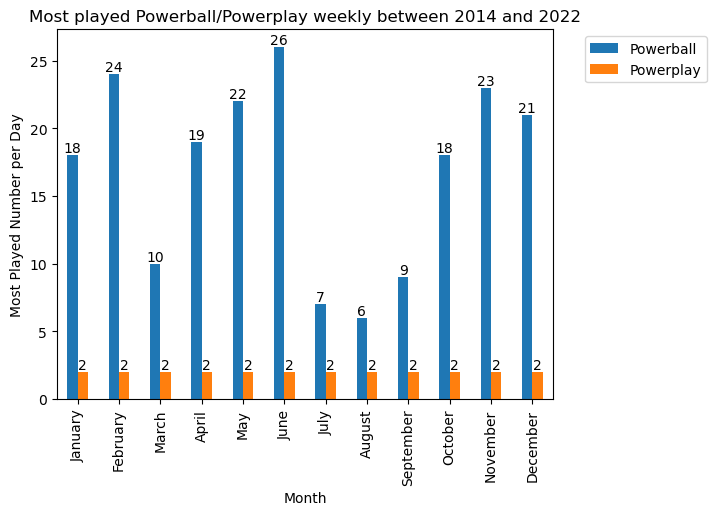

In [10]:
# question 2 Graphed

# Explode my combined_common_months so that I can put it back into a dataframe that is more malleable for graphing
powerplay_nums = combined_common_months['Common Powerplays'].explode()
powerball_nums = combined_common_months['Common Powerballs'].explode()


# Create a new DataFrame with the exploded data
powerplay_nums = pd.DataFrame({'Month': powerplay_nums.index, 'Type': 'Powerplay', 'Value': powerplay_nums.values})
powerball_nums = pd.DataFrame({'Month': powerball_nums.index, 'Type': 'Powerball', 'Value': powerball_nums.values})

powerplay_powerball_nums = pd.concat([powerplay_nums, powerball_nums], axis = 0)


# https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html, https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-pivot
# https://builtin.com/data-science/pandas-pivot-tables
# Index is set to 'Month' in powerplay_powerball_nums_2020
# Columns is set to 'Type' from powerplay_powerball_nums_2020 (powerball, powerplay)
# values is set to 'Value' column which is the powerplay numbers and powerball numbers respectively.
# The aggfunc took longer to figure out, it takes the first non-null value for each index and column values

ax = powerplay_powerball_nums.pivot_table(index='Month', columns='Type', values='Value', aggfunc='first').plot(kind='bar')
plt.ylabel('Most Played Number per Day')
plt.title('Most played Powerball/Powerplay weekly between 2014 and 2022')
plt.xticks(rotation=90)
for container in ax.containers:
    ax.bar_label(container)
    
# Create a custom legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']
ax.set_xticklabels(months)

plt.show()


In [11]:
# generate a new dataframe to hold year data for weekday, powerplay, powerball
year_tot_common = wa_lottery_df.copy()
powerlist = ['powerball', 'powerplay']
# use the same function as before to find the maxiumum value that is repeated over the entire year for powerplay and powerball
year_common_powernums = year_tot_common.groupby('weekday')[powerlist].apply(lambda x: x.mode().max())


#Answer to Question 3

print(f"There was only one common PowerBall number for Saturday {year_common_powernums.loc['Sat', 'powerball']}, and Wednesday {year_common_powernums.loc['Wed', 'powerball']}")
print(f"There was only one common PowerBall number for Saturday {year_common_powernums.loc['Sat', 'powerplay']}, and Wednesday {year_common_powernums.loc['Wed', 'powerplay']}")


There was only one common PowerBall number for Saturday 18.0, and Wednesday 24.0
There was only one common PowerBall number for Saturday 2.0, and Wednesday 2.0


In [12]:
# make a copy of the original DataFrame to manipulate
month_lottery_df = wa_lottery_df.copy()

# convert the date column object(mm/dd/yyyy) into a datetime object (yyyy-mm-dd) [pandas reference: 
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html]
month_lottery_df['date'] = pd.to_datetime(month_lottery_df['date'])

# Now I can generate a new column that will hold the months 
# (ex: january == 1, february == 2)
# [pandas.Series.dt = https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.html]
month_lottery_df['month'] = month_lottery_df['date'].dt.month

# make a variable that holds a groupby function for month in
# dataframe date_powerball
month = month_lottery_df.groupby('month')

# create an empty dictionary
jackpot_common = {}

# create a loop that will iterate through 1-12 (for the months).  
for i in range(1, 13):
    
    #set a variable to hold the group by each month
    month_data = month.get_group(i) 
    
    # take the variable month_data find the greatest
    jackpot_common[i] = month_data['jackpot'].mode().max()

# I utilized pd.DataFrame.from_dict() from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html 
# to convert my dictionary from my for loop into a DataFrame.
jackpot_common_months = pd.DataFrame.from_dict(jackpot_common, orient='index', columns=['Common Jackpot'])

# https://stackoverflow.com/questions/61842649/renaming-months-from-number-to-name-in-pandas
# Utilizing pythons calendar function, converted the index to the abbreviated months
# Use calendar library for month name
month = dict((enumerate(calendar.month_name)))

# add month to dataframe
jackpot_common_months['Months'] = month


# Sort the schools by `% Overall Passing` in descending order and display the top 5 rows.
top_months_jackpot = jackpot_common_months.sort_values(by=['Common Jackpot'], ascending = False)


# ANSWER QUESTION 4

print(top_months_jackpot.head(5))

    Common Jackpot    Months
12     100000000.0  December
5       90000000.0       May
10      80000000.0   October
2       70000000.0  February
4       60000000.0     April


In [14]:
# Generated a new dataframe that holds only the three columns 'date' + 'weekday' + 'jackpot'
weekday_jackpot = wa_lottery_df[['date', 'weekday', 'jackpot']]

# find the highest jackpot
greatest_jackpot = weekday_jackpot.loc[weekday_jackpot['jackpot'].idxmax()]



#ANSWER QUESTION 5 

print(f"{greatest_jackpot.date} had the greatest jackpot for 2020 with {greatest_jackpot.jackpot} dollars.")

11/2/2022 had the greatest jackpot for 2020 with 120000000000.0 dollars.


In [15]:
top_months_jackpot

,Common Jackpot,Months
12,100000000.0,December
5,90000000.0,May
10,80000000.0,October
2,70000000.0,February
4,60000000.0,April
7,60000000.0,July
3,40000000.0,March
6,40000000.0,June
8,40000000.0,August
9,40000000.0,September


C:\Users\eeels\AppData\Local\Temp\ipykernel_6784\1836799330.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(months)


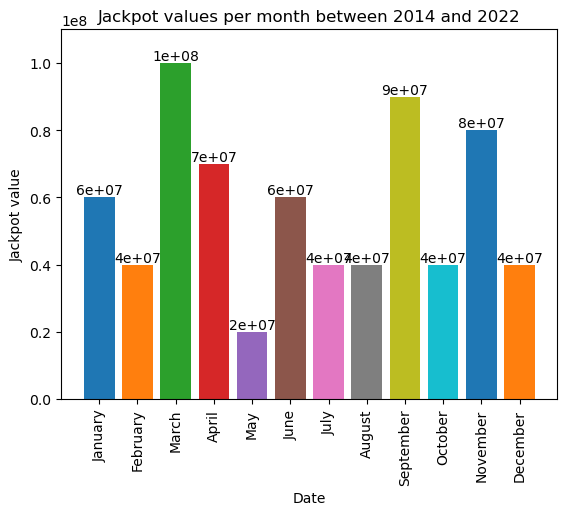

In [16]:
# weekday_jackpot['date'] = pd.to_datetime(weekday_jackpot['date'])
# top_months_jackpot

fig, ax = plt.subplots()


for day, group in top_months_jackpot.groupby('Months'):
    ax.bar(group['Months'], height = group['Common Jackpot'])

# Set the title and axis labels
for container in ax.containers:
    ax.bar_label(container)
ax.set_ylim([0, 11e7])
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']
ax.set_xticklabels(months)
plt.xticks(rotation=90)
ax.set_title('Jackpot values per month between 2014 and 2022')
ax.set_xlabel('Date')
ax.set_ylabel('Jackpot value')

plt.show()

In [39]:
# Delimiter break the white numbers for all years, find the frequency as a scatterplot.
wa_lottery = wa_lottery_df[['date', 'winning_numbers']].copy()
wa_lottery_white_numbers = wa_lottery['winning_numbers']

wa_lottery_number = wa_lottery_white_numbers.str.split("-")
wa_lottery_number = wa_lottery_number.explode()

wa_lottery_number.value_counts()



39    89
32    88
21    84
28    81
36    80
      ..
67    57
65    54
26    53
60    52
66    52
Name: winning_numbers, Length: 69, dtype: int64